#### Missing data

- Real-world data often has missing values. Data can have missing values for a number of reasons such as observations that were not recorded and data corruption. 
- Handling missing data is important as many machine learning algorithms do not support data with missing values.
- Its important to understand the missing value. Sometime a zero value or a null value can be a valid value and not missing. We need to work with domian experts to identify the missing value, and set the baseline.
- Sometime missing values are indicated by out of range value like -1. or "?" or empty string , or undefined, or NA, or NaN, or NULL, or None, or etc. it can be anything. **We need to work with domian experts to identify the missing value, and set the baseline.**
- We can see that columns 1, 2 and 5 have just a few zero values, whereas columns 3 and 4 show a lot more, nearly half of the rows. This highlights that different missing value strategies may be needed for different columns

- **When a predictor is discrete in nature, missingness can be directly encoded into the predictor as if it were a naturally occurring category.**
    - If a feature (column) is categorical/discrete — meaning it contains categories, then instead of removing rows or imputing values, you can treat missing values as a new valid category.
    - Suppose we have a column having 3 caegories like "Red, Blue, Green" and we have a missing value. We can encode it as "Missing". So our total categories will be "Red, Blue, Green, Missing".

    - **Why does this make sense?**
        - Because in categorical data:
            - Missing may not be random.
            - Missingness itself could contain meaning.
        - **example**:
            | Job Type      | Approved Loan? |
            | ------------- | -------------- |
            | Salaried      | Yes            |
            | Self-employed | Yes            |
            | NaN           | No             |
            | Salaried      | Yes            |

        - People with missing job type might represent:
            - Low documentation applicants
            - Risky profiles
            - Deliberate non-disclosure

        - So treating missingness as a signal lets the model learn patterns from it.  

    - **When does this NOT apply?**
        - If a feature is continuous, then missingness is not a valid category. 
        - example : these below col-values doesn't make sense.
            - Height = "Missing"
            - Salary = -99999 (bad practice) 
        - Instead, we typically:
            - Impute with mean/median
            - Use special encodings like indicator flags for missingness
    

In [1]:
from pandas import read_csv

dataset = read_csv('./data/pima-indians-diabetes.csv')
dataset.describe()

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [2]:
# Lets take 0 as a missing value
# Then lets find out all the missing values.
from pandas import read_csv
# load the dataset
dataset = read_csv('./data/pima-indians-diabetes.csv', header=None) # count the number of missing values for each column 
num_missing = (dataset[[1,2,3,4,5]] == 0).sum()
# report the results
print(num_missing)

1      5
2     35
3    227
4    374
5     11
dtype: int64


In [6]:
# example of marking missing values with nan values
from numpy import nan
from pandas import read_csv

# load the dataset
dataset = read_csv('./data/pima-indians-diabetes.csv', header=None)

# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)

# count the number of nan values in each column
print(dataset.isnull().sum())
print(dataset.shape)
dataset.head(20)


0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64
(768, 9)


,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


##### There are ML algorithms which doesn't work on data with missing values.
- for example LinearDiscriminantAnalysis

In [8]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

values = dataset.values
X = values[:,0:8]
y = values[:,8]

# define the model
model = LinearDiscriminantAnalysis()

# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)

# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy') # report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: nan


/opt/miniconda3/envs/lap/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/lap/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/envs/lap/lib/python3.9/site-packages/sklearn/discriminant_analysis.py", line 544, in fit
    X, y = self._validate_data(
  File "/opt/miniconda3/envs/lap/lib/python3.9/site-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params

### Techniques to handle missing values

#### 1. Removing/dropping rows with missing values
- we can use panda's dropna() function to remove rows with missing values, any one column has missing values will be dropped.
    - replace all missing values with a null/nan value.
    - dropna() function can be used to remove rows with missing values.

In [9]:
# summarize the shape of the raw data
print(dataset.shape)
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan) # drop rows with missing values
dataset.dropna(inplace=True)
# summarize the shape of the data with missing rows removed 
print(dataset.shape)

(768, 9)
(392, 9)


#### 2. Statistical Imputation

- It is good practice to identify and replace missing values for each column in your input data prior to modeling your prediction task. This is called **missing data imputation**.
- A popular approach for data imputation is to calculate a statistical value for each column (such as a mean) and replace all missing values for that column with the statistic.

- Common statistics calculated include:
    - The column **mean** value.
    - The column **median** value. 
    - The column **mode** value.
    - A **constant** value.


In [18]:
dataframe = read_csv('./data/horse-colic.csv', header=None)
dataframe.head()
# we can see that this dataset has many "?" values, which are missing values.  So to let pandas handle missing values, we need to replace "?" with np.nan

#dataframe.replace('?', np.nan, inplace=True)
#dataframe.isnull().sum()
#dataframe.isnull().sum().sort_values(ascending=False)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2


In [ ]:
# While reading the dataframe, we can mark which column vaue represents missing value
dataframe = read_csv('./data/horse-colic.csv', header=None, na_values=['?'])
dataframe.isnull().sum()

# summarize the number of rows with missing values for each column
for i in range(dataframe.shape[1]):
    # count number of rows with missing values
    n_miss = dataframe[[i]].isnull().sum()
    perc = n_miss / dataframe.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc)) 


##### 2.1 Simple Imputation using sklearn.SimpleImputer
- in SimpleImputer we can pass the Startegies like `strategy='mean'`, `strategy='median'`, `strategy='most_frequent'`, `strategy='constant'`

- While imputing data, make sure that we don't do a data leakage. i.e. we should not use the test data to impute the train data. SO we should use a pipeline to impute the data and evaluate the model on the test data.


In [22]:
# statistical imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer

# load dataset
dataframe = read_csv('./data/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values

ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# summarize total missing
print('Missing: %d' % sum(isnan(X).flatten()))

# define imputer
imputer = SimpleImputer(strategy='mean')

# fit on the dataset
imputer.fit(X)

# transform the dataset
Xtrans = imputer.transform(X)

# summarize total missing
print('After imputation Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
After imputation Missing: 0


In [26]:
# evaluate mean imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

# load dataset
dataframe = read_csv('./data/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# define modeling pipeline
model = RandomForestClassifier()
imputer = SimpleImputer(strategy='mean')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.871 (0.051)


**2.1.1: Evaluate different imputation strtegies with our model**
- we have different imputation strategies like `strategy='mean'`, `strategy='median'`, `strategy='most_frequent'`, `strategy='constant'`
- We can try out all the startegies and see which one is best for our model

>mean 0.867 (0.049)
>median 0.878 (0.062)
>constant 0.880 (0.056)
[array([0.86666667, 0.83333333, 0.86666667, 0.83333333, 0.93333333,
       0.9       , 0.9       , 0.93333333, 0.76666667, 0.8       ,
       0.9       , 0.86666667, 0.9       , 0.9       , 0.86666667,
       0.83333333, 0.86666667, 0.8       , 0.8       , 0.93333333,
       0.8       , 0.93333333, 0.83333333, 0.93333333, 0.86666667,
       0.8       , 0.86666667, 0.93333333, 0.83333333, 0.9       ]), array([0.93333333, 0.8       , 0.9       , 0.9       , 0.93333333,
       0.9       , 0.9       , 0.96666667, 0.73333333, 0.8       ,
       0.86666667, 0.93333333, 0.9       , 0.9       , 0.86666667,
       0.83333333, 0.9       , 0.8       , 0.8       , 0.93333333,
       0.8       , 0.93333333, 0.83333333, 0.96666667, 0.86666667,
       0.76666667, 0.9       , 0.96666667, 0.86666667, 0.93333333]), array([0.9       , 0.86666667, 0.86666667, 0.83333333, 0.93333333,
       0.93333333, 0.9       , 0.96666667, 0.73333333, 0.8

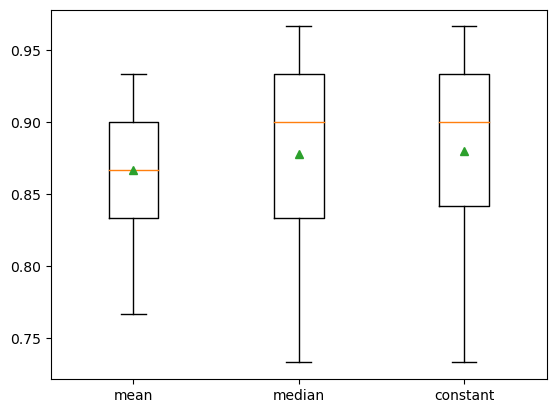

In [34]:
# compare statistical imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# load dataset
dataframe = read_csv('./data/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median',  'constant']
for s in strategies:

	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', RandomForestClassifier())])

	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) # return list of scores for each fold

	# store results
	results.append(scores) # here we have array of scores for each fold, [[], [], []]
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))

# plot model performance for comparison
print(results)
print(strategies)
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

##### Interpreating the above chart
- Every kfold validation has split 10 and repeate 3, So it will have 30 experiments. 
- Each 30 time we get a accurecy score.  that 30 scores has been plotted as one box.
- Green triangle is the mean of the accurecy of all the 30 experiments.
- Orange line is median of the accurecy for all the 30 experiments.
- Box spread is acurecy range for all 30 experiments. Box height is IQR.
- Each startegy has one box.
    - mean ~ median ((green triangle near orange line)) means:  The distributions are relatively symmetric, with no extreme outliers pulling the average away from the median.
    - mean is higher: that startegy may be better.

##### Predicting using simpleimputer.

- We used pipeline to use SimpleImputer, it will only apply the imputer on train data and then separetely apply Imputer on test data during kfoldvalidation.
- So when we are predcting using the model, we should use the same pipeline for record for which we are predcting.

- **How Imputation Works in Pipelines**
    - When you call pipeline.fit(X, y), the imputer learns the imputation values from the training data and stores them. During prediction, it uses these stored values, not values calculated from the new data.
    - **For Constant Strategy**: by default it uses value `0`.
        - We can change the value using `SimpleImputer(strategy="constant", fill_value=999)`
        - What constant or value it learns/stores during tarining, it will use same value for prediction.
    - **For Mean Strategy**: 
        - During training (fit): The imputer calculates and stores the mean of each column from the training data (X)
        - During prediction (transform): The imputer uses the stored means to impute missing values in the new data (X)


In [36]:
# constant imputation strategy and prediction for the horse colic dataset
from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# load dataset
dataframe = read_csv('./data/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# create the modeling pipeline
pipeline = Pipeline(steps=[('i', SimpleImputer(strategy='constant')), ('m', RandomForestClassifier())])

# fit the model
pipeline.fit(X, y)

# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00, 8.40, nan, nan, 2, 11300, 00000, 00000, 2]

# make a prediction
yhat = pipeline.predict([row]) # use the same pipeline to predict, So that it will handle missing value in the same way as it has imputed during training.

# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


In [ ]:
# Demo for How imputer works internally

from sklearn.impute import SimpleImputer
import numpy as np

# Training data
X_train = np.array([[1, 2], [3, 4], [5, np.nan], [7, 8]])

# Create and fit imputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)

# The imputer stored the mean of each column
print("Stored statistics:", imputer.statistics_)  
# Output: [4.  4.66666667]  <- mean of col 0: (1+3+5+7)/4, mean of col 1: (2+4+8)/3

# New data with missing values
X_new = np.array([[np.nan, 10], [9, np.nan]])

# Transform uses the STORED means, not means from X_new
X_imputed = imputer.transform(X_new)
print("Imputed data:", X_imputed)
# Output: [[4.         10.        ]   <- used stored mean 4.0 for missing value
#          [9.          4.66666667]]  <- used stored mean 4.67 for missing value

Stored statistics: [4.         4.66666667]
Imputed data: [[ 4.         10.        ]
 [ 9.          4.66666667]]


# KNN imputation
- A popular approach to missing data imputation is to use a model to predict the missing values.
- This requires a model to be created for each input variable that has missing values. 
- Although any one among a range of different models can be used to predict the missing values.
- Missing values must be marked with NaN values and can be replaced with nearest neighbor estimated values.
- KNNImputer has 3 main parameters:
    - `n_neighbors`: Number of neighbors to use for imputation. The number of neighbors is set to five by default and can be configured by the n neighbors argument
    - `metric`: Metric to use for distance calculation. it can be `nan_euclidean`, `manhattan`, `minkowski` etc.
    - `weights`: Weights to use for distance calculation. it can be `uniform`, `distance` etc.

- **What "NaN-aware Euclidean distance" Means**
    - when calculating distances, KNNImputer ignores features (columns) that have NaN values in either of the two samples being compared.
    - **Regular Euclidean Distance (Not NaN-aware)**
        - For two samples with features [x₁, x₂, x₃] and [y₁, y₂, y₃]:
            - distance = sqrt((x₁ - y₁)² + (x₂ - y₂)² + (x₃ - y₃)²) 
            - **Problem**: If any value is NaN, the entire calculation fails or gives NaN.
    - **NaN-aware Euclidean Distance**
        - Only uses features that are present (not NaN) in BOTH samples:
            - Sample A: [1.0, NaN, 3.0, NaN]
            - Sample B: [2.0, 5.0, NaN, 4.2]
            - `Features 1, 2, and 3 have NaN in at least one sample
            - Only feature 0 is available in BOTH

            - distance = √[(1.0-2.0)²] = 1.0

- **The metric Argument in KNNImputer**
    - `KNNImputer(n_neighbors=5, metric='nan_euclidean')  # default`
    - Other metrics like `manhattan`, `minkowski` can also be NaN-aware

- **The weights Argument in KNNImputer**
    - 1. **weights='uniform' (default)**
        - All neighbors contribute equally, regardless of their distance.
        - 
    ```python
        from sklearn.impute import KNNImputer
        import numpy as np

        X = np.array([
            [1.0, 2.0, 3.0],   # Sample 0
            [2.0, 4.0, 5.0],   # Sample 1
            [3.0, NaN, 7.0],   # Sample 2 - needs imputation
            [10.0, 8.0, 9.0],  # Sample 3
        ])

        imputer = KNNImputer(n_neighbors=2, weights='uniform')
        X_imputed = imputer.fit_transform(X)
    ```
    - **To impute Sample 2, feature 1**: 
        - 1. Find 2 nearest neighbors (let's say Samples 0 and 1)
        - 2. Simple average of their values: Imputed value = (2.0 + 4.0) / 2 = 3.0

    - 2. **weights='distance'**
        - **Closer neighbors have MORE influence** than farther neighbors. The weight is inversely proportional to distance.
        - To impute Sample 2, feature 1: 
            - 1. Find 2 nearest neighbors with their distances:
                - Sample 0: distance = 2.0, value = 2.0
                - Sample 1: distance = 4.0, value = 4.0
            - 2. Calculate weights:
                - Sample 0: weight_0 = 1.0 / 2.0 = 0.5
                - Sample 1: weight = 1.0 / 4.0 = 0.25
            - 3. Weighted average: 0.5 + 0.25 = 0.75    
            - 4. Calculate imputed value:
                - Imputed value = ((2.0 * 0.5) + (4.0 * 0.25)) / 0.75 = (1.0 + 1.0) / 0.75 = 2.67
                
            - **Sample 0 (closer) contributes **66.7%** (0.5/0.75), while Sample 1 (farther) contributes only **33.3%** (0.25/0.75).**    



        


In [38]:
# knn imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# load dataset
dataframe = read_csv('./data/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# summarize total missing
print('Missing: %d' % sum(isnan(X).flatten()))

# define imputer
imputer = KNNImputer()

# fit on the dataset
imputer.fit(X)

# transform the dataset
Xtrans = imputer.transform(X)

# summarize total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


**Simillary for KnnImputer we need to use Pipeline to avoid data leakage during model training .**

In [4]:
# evaluate knn imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

# load dataset
dataframe = read_csv('./data/horse-colic.csv', header=None, na_values='?')
print(dataframe.shape)

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# define modeling pipeline
model = RandomForestClassifier()
imputer = KNNImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


(300, 28)
Mean Accuracy: 0.859 (0.056)


**Does number of Neighbour affects KnnImputer behaviour which inturn affects models behaviour ?**

- Simillarly we can experiment with weights parameter and metric parameter then see the effect on models performance.

>1 0.861 (0.052)
>3 0.863 (0.060)
>5 0.861 (0.057)
>7 0.861 (0.054)
>9 0.867 (0.052)
>15 0.860 (0.050)
>18 0.859 (0.054)
>21 0.861 (0.052)


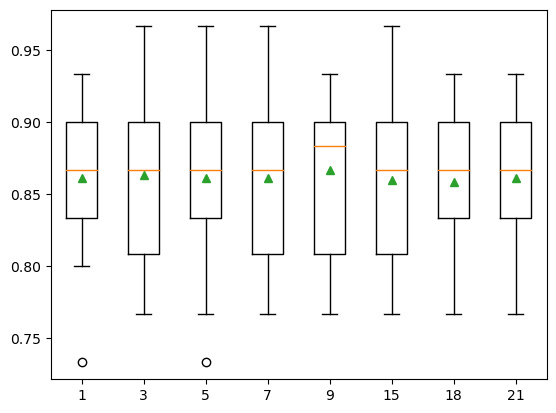

In [2]:
# compare knn imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# load dataset
dataframe = read_csv('./data/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:

	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])

	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

#### Predict using the model trained by data imouted by Knnimputer

- Like SimpleImputer, here also we need to use same pipeline to predict from the model, So that the pipeline can use same KnnImputer to impute the missing values in the test data.


In [5]:
# knn imputation strategy and prediction for the horse colic dataset
from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

# load dataset
dataframe = read_csv('./data/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# create the modeling pipeline
pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=21)), ('m', RandomForestClassifier())])

# fit the model
pipeline.fit(X, y)

# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00, 8.40, nan, nan, 2, 11300, 00000, 00000, 2]

# make a prediction
yhat = pipeline.predict([row])

# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


#### Iterative Imputation

##### Problem with Simple Imputation
    - In Simple imputation we use the same value to impute all the missing values of the feature. 

```
    Data with missing values:
    Feature A    Feature B    Feature C
    1.0          NaN          3.0
    2.0          5.0          NaN
    NaN          6.0          7.0

    With SimpleImputer (mean):
        Feature A    Feature B    Feature C
        1.0          5.5          5.0      ← Fill B with mean
        2.0          5.0          5.0      ← Fill C with mean
        1.5          6.0          7.0      ← Fill A with mean 
```

- **Problem**: Each feature is imputed independently, ignoring relationships between features!
    - For example:
        - If Feature A (age) and Feature B (salary) are correlated (older → higher salary)
        - Simple imputation doesn't use this relationship
        - A 60-year-old with missing salary gets the same imputed value as a 20-year-old

- **Iterative Imputation (The Solution)**: 
    - **Core idea**: Use the relationships between features to make better predictions.
    - **Simple Analogy**
        - Think of it like filling in a crossword puzzle:
            - **Simple Imputation** = Guessing each blank independently
                - See a blank? Just write a common letter like "E"
                - Ignore all the other words and clues
            - **Iterative Imputation** = Using cross-references
                - Look at intersecting words
                - Use clues from completed parts    
                - Keep refining your guesses until everything fits together

    - **How Iterative Imputation Works** 
        - ``` 
            Initial data:
            Age    Salary    Experience    Education
            25     NaN       2             Bachelor
            NaN    60000     5             Master
            45     NaN       NaN           PhD
            30     50000     3             Bachelor

        **Step 1: Initial Fill (placeholder)**: start with a bad guess, it can be mean/median or most_frequent
            - Fill all missing values with mean/median (just to start):
        ```
            Age    Salary    Experience    Education
            25     55000     3.3           Bachelor    ← Salary filled
            33.3   60000     5             Master      ← Age filled
            45     55000     3.3           PhD         ← Salary & Exp filled
            30     50000     3             Bachelor    
        ```           
        
    - **Step 2: Iterate - Refine Each Feature**
        - **Iteration1:**
            - Predict missing Salary using Age, Experience, Education
                - Use regression model to predict Salary for row0, from predictor (Age=25, Exp=2, Edu=Bachelor)
                - Use regression model to predict Salary for row2, from predictor (Age=45, Exp=3.3, Edu=PhD)
                - Fill the predicted value in Age column for row0 and row1
            - Predict missing Age using Salary, Experience, Education
                - For row 1 use the regression model to predict age, from  (Salary=60000, Exp=5, Edu=Master):

            - Predict missing Experience using Age, Salary, Education
        - **Iteration2:**
            - Repeat the process until the values converge (stabilizes) or reach a predefined number of iterations .

    -  **Fully Conditional Specification (FCS)** or **Multivariate Imputation by Chained Equations (MICE)**: These are just fancy names for **Iterative Imputation**! , it called so because we are creating a chain of equations.
        - Equation 1: Age = f(Salary, Experience, Education)
        - Equation 2: Salary = f(Age, Experience, Education)
        - Equation 3: Experience = f(Age, Salary, Education)
        - Equation 4: Education = f(Age, Salary, Experience)           

    - **Why we need multiple iterations?**
        - We have missing value in many columns. In each iteration we are using the predicted value from the previous iteration. So gradually we will see that values will converge to a stable point.  It means the predicting the missing value with iteration doesn't change much. the value stabilizes.
        - What Does "Convergence" Mean?
            - Convergence = When the imputed values stop changing significantly between iterations.
            - In other words:
                - The predictions become stable
                - Further iterations don't improve the estimates much
                - The algorithm has found a "good enough" solution

            - **Visual Example of Convergence** :
            - Let's track how a missing value changes across iterations:
         
                ```
                    Missing Salary for a 25-year-old with 2 years experience:

                Iteration 0 (initial): 60000  (just the mean)
                Iteration 1:           48000  (big change: -12000)
                Iteration 2:           46500  (change: -1500)
                Iteration 3:           46100  (change: -400)
                Iteration 4:           46000  (change: -100)
                Iteration 5:           45980  (change: -20)
                Iteration 6:           45975  (change: -5)
                Iteration 7:           45974  (change: -1)
                Iteration 8:           45974  (change: 0)    ← CONVERGED!
                Iteration 9:           45974  (change: 0)
                ``` 

    - **IterativeImputer from sklearn.impute**
        - Understanding the parameters:
            - `max_iter`: Maximum number of iterations (default=10)
            - `tol`: Tolerance for convergence (default=0.01)
            - `n_nearest_features`: Number of nearest features to use for imputation (default=None)
            - `imputation_order`: Order in which features are imputed (default='ascending')
            - `missing_values`: Value to consider as missing (default=np.nan)
            - `estimator`: Estimator to use for imputation (default=LinearRegression())
        

        - `tol`: Tolerance for convergence (default=0.01) : If all imputed values change by less than 0.001 between iterations, then the algorithm considered converged.
        - `imputation_order`: Order in which features are imputed (default='ascending') :
            - '**ascending**': Impute features in ascending order (left to right).
                - Default choice, works well in most cases, Good when you've ordered features logically (e.g., basic info → derived features)
            - '**descending**': Impute features in descending order (right to left).
                - When later features are more important or better predictors, rarely used in practice
            - '**roman**': Impute features by amount of missing data (fewest missing values first).
                - Recommended when missing data is unevenly distributed, Most robust choice in many real-world scenarios.
            - '**arabic**': Impute features by amount of missing data (most missing values first)
                - Can be useful when you want to tackle difficult imputations first, less common
            - **random** : Impute features randomly. 
        - `estimator`: there are many regression model based estimator we can use, default is `BayesianRidge` , we can also use `LinearRegression` or `RandomForestRegressor`, `kneighborsregressor`        
         
        - There are many other useful params also.
         


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np

# Data with relationships: Salary roughly = Age * 2000
X = np.array([
    [25,    np.nan,  2],      # Young person, missing salary
    [np.nan, 60000,  5],      # Missing age
    [45,     np.nan, 20],     # Older person, missing salary
    [30,     50000,  3],      # Complete
    [35,     70000,  10],     # Complete
])

# Simple Imputation (mean)
from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer(strategy='mean')
X_simple = simple_imputer.fit_transform(X)

print("Simple Imputation:")
print(X_simple)
# All missing salaries get ~60000 (mean), regardless of age

print("\n" + "="*50 + "\n")

# Iterative Imputation (considers relationships)
iter_imputer = IterativeImputer(max_iter=100, random_state=0)
X_iterative = iter_imputer.fit_transform(X)

print("Iterative Imputation:")
print(X_iterative)
# Missing salaries adjusted based on age:
# - 25-year-old gets lower salary (~45000)
# - 45-year-old gets higher salary (~85000)


Simple Imputation:
[[2.500e+01 6.000e+04 2.000e+00]
 [3.375e+01 6.000e+04 5.000e+00]
 [4.500e+01 6.000e+04 2.000e+01]
 [3.000e+01 5.000e+04 3.000e+00]
 [3.500e+01 7.000e+04 1.000e+01]]


Iterative Imputation:
[[2.50000000e+01 5.99999835e+04 2.00000000e+00]
 [2.99269937e+01 6.00000000e+04 5.00000000e+00]
 [4.50000000e+01 6.00000444e+04 2.00000000e+01]
 [3.00000000e+01 5.00000000e+04 3.00000000e+00]
 [3.50000000e+01 7.00000000e+04 1.00000000e+01]]


In [4]:
# iterative imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# load dataset
dataframe = read_csv('./data/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# summarize total missing
print('Missing: %d' % sum(isnan(X).flatten()))

# define imputer
imputer = IterativeImputer()

# fit on the dataset
imputer.fit(X)

# transform the dataset
Xtrans = imputer.transform(X)

# summarize total missing
print('After imputation Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
After imputation Missing: 0


In [5]:
# evaluate iterative imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

# load dataset
dataframe = read_csv('./data/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# define modeling pipeline
model = RandomForestClassifier()
imputer = IterativeImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.866 (0.055)


>ascending 0.868 (0.052)
>descending 0.876 (0.049)
>roman 0.867 (0.056)
>arabic 0.873 (0.048)
>random 0.871 (0.050)


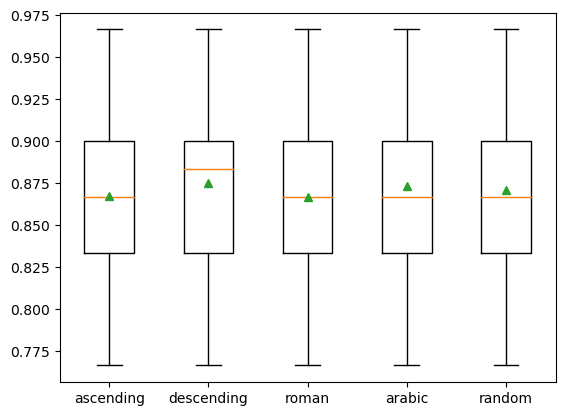

In [7]:
# compare iterative imputation_order for the horse colic dataset

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# load dataset
dataframe = read_csv('./data/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset
results = list()
strategies = ['ascending', 'descending', 'roman', 'arabic', 'random']

for s in strategies:

	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', IterativeImputer(imputation_order=s)), ('m', RandomForestClassifier())])

	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

>1 0.869 (0.051)
>2 0.870 (0.050)
>3 0.871 (0.056)
>4 0.871 (0.050)
>5 0.876 (0.056)
>6 0.871 (0.055)
>7 0.869 (0.051)
>8 0.872 (0.054)
>9 0.869 (0.052)
>10 0.872 (0.054)
>11 0.864 (0.056)
>12 0.868 (0.053)
>13 0.868 (0.051)
>14 0.869 (0.049)
>15 0.863 (0.051)
>16 0.871 (0.051)
>17 0.874 (0.052)
>18 0.872 (0.052)
>19 0.872 (0.052)
>20 0.876 (0.052)


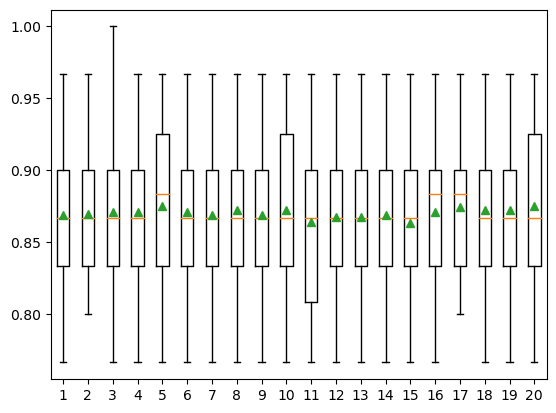

In [8]:
# compare model on iterative imputation number of iterations for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# load dataset
dataframe = read_csv('./data/horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in range(1, 21)]

for s in strategies:

	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', IterativeImputer(max_iter=int(s))), ('m', RandomForestClassifier())])

	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()